# Computational Methods in Economics

## Lecture 2 - Solving Systems of Linear Equations

In [50]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-08-08 18:29:37.196337


### Preliminaries

#### Import Modules

In [45]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import numpy as np
import scipy.optimize
import scipy.linalg


# import sys
from importlib import reload

### Review: Matrices

Let $A$ be a m-by-n matrix:
\begin{split}A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    a_{m1} & a_{m2} & \cdots & a_{mn}
\end{array}
\right]\end{split}

A n-by-n matrix is called a *square* matrix of order $n$:
\begin{split}A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{array}
\right]\end{split}

A matrix $D$ of order $n$ is *diagonal* if all its non-zero elements are on its diagonal (i.e. the entries $a_{ij}$ with $i = j$):
\begin{split}D =
\left[
\begin{array}{cccc}
    a_{11} & 0 & \cdots & 0 \\
    0 & a_{22} & \cdots & 0 \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]\end{split}

A matrix $L$ of order $n$ is *lower triangular* if all its non-zero elements are either diagonal entries or *strictly lower triangular* entries (i.e. the entries $a_{ij}$ for which $i > j$):
\begin{split}L =
\left[
\begin{array}{cccc}
    a_{11} & 0 & \cdots & 0 \\
    a_{21} & a_{22} & \cdots & 0 \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{array}
\right]\end{split}

A matrix $U$ of order $n$ is *upper triangular* if all its non-zero elements are either diagonal entries or *strictly upper triangular* entries (i.e. the entries $a_{ij}$ for which $i < j$):
\begin{split}U =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    0 & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]\end{split}

#### Matrices in Python

In Python, matrices are best coded as *Numpy arrays*:

In [85]:
## define matrix
A = np.array([[2, 0, -1, 2],
              [4, 2, -1, 4],
              [2, -2, -2, 3],
              [-2, 2, 7, -3]])

## access elements by indices
print(A[2,1])
print(A[3,2])


-2
7


### Review: Nonsingular vs. singular matrix

-1.0
[ 1.  2.]


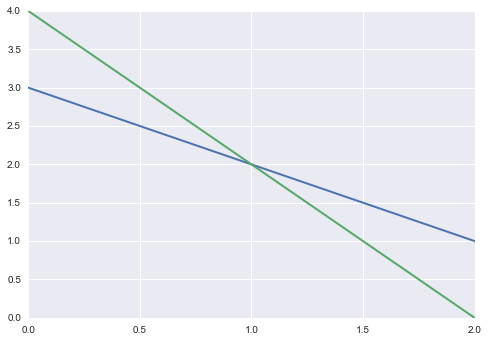

In [41]:
A = np.array([[1, 1],
              [2, 1]])
b = np.array([3, 4])

print(np.linalg.det(A))
print(np.linalg.solve(A, b))

f1 =  lambda x: 3 - x
f2 =  lambda x: 4 - 2 * x
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots()
ax.plot(x, f1(x) , linewidth= 2)
ax.plot(x, f2(x) , linewidth= 2)

# ax.vlines(x_mc, 0, 5, color='k', linestyle="--", linewidth= 2)
# ax.hlines(p_mc, 0, 10, color='k', linestyle="--", linewidth= 2)


0.0


ValueError: x and y must have same first dimension

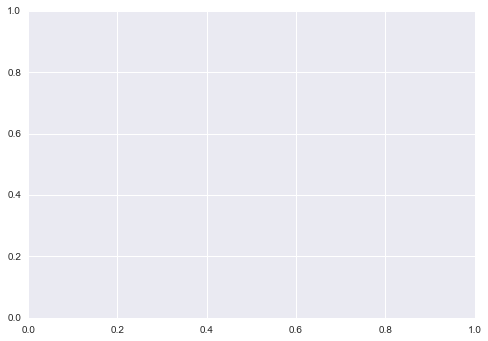

In [42]:
A = np.array([[0, 1],
              [0, 2]])
b = np.array([3, 4])

print(np.linalg.det(A))
# print(np.linalg.solve(A, b))

##### How to show this graphically?
f1 =  lambda x: 3 
f2 =  lambda x: 4 / 2
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots()
ax.plot(x, f1(x) , linewidth= 2)
ax.plot(x, f2(x) , linewidth= 2)


In [27]:
A = np.array([[1, 0, 0],
              [4, 0, 0],
              [2, 3, 5]])

In [28]:
np.linalg.det(A)

0.0

### System of Linear Equations

Let $x$ be a n-by-1 vector: $x = [x_1, x_2, ... , x_n]'$. Then
\begin{equation}
Ax = b
\end{equation}

\begin{equation}
\begin{split}A x
=
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1n} \\
    \vdots & \vdots  & \vdots \\
    a_{m1} &  \cdots & a_{mn}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{n}
\end{array}
\right] 
&=
\left[
\begin{array}{c}
    a_{11} x_1 + \cdots + a_{1n} x_n \\
    \vdots \\
    a_{m1} x_1 + \cdots + a_{mn} x_n
\end{array}
\right] \\
&=
\left[
\begin{array}{c}
    a_{11} \\
    \vdots \\
    a_{m1} 
\end{array}
\right] x_1 +
...
+ \left[
\begin{array}{c}
    a_{1n}  \\
    \vdots \\
    a_{mn} 
\end{array}
\right] x_n
\end{split}
\end{equation} 




### Solving Triangular Linear Systems

In [73]:
A = np.array([[2, 0, 0, 0],
              [4, 2, 0, 0],
              [2, -2, -2, 0],
              [-2, 2, 7, -3]])

b = np.array([1, 1, 1, 1]) 

np.linalg.solve(A, b)


array([ 0.5       , -0.5       ,  0.5       ,  0.16666667])

In [83]:
def forward_sub(A, b):
    """
    Implements the forward substitution algorithm to solve an upper triangular system of equations
    """
    n, m = A.shape
    
    assert n == m, "A must be a square matrix"
    
    x = np.zeros(n)
    
    for i in range(n):
        
        summ = 0
        for j in range(i):
            summ += A[i, j] * x[j]
        
        x[i] = (b[i] - summ) / A[i, i]   
    
    return x

forward_sub(A, b)


array([ 0.5       , -0.5       ,  0.5       ,  0.16666667])

### Gaussian Elimination

Let $L$ denote a *lower triangular* square matrix:
\begin{split}L =
\left[
\begin{array}{ccccc}
    a_{11} & 0 & 0 & \cdots & 0 \\
    a_{21} & a_{22} & 0 & \cdots & 0 \\
    \vdots & \vdots & \vdots & & \vdots \\
    a_{n1} & a_{n2} & a_{n3} &\cdots & a_{nn}
\end{array}
\right]\end{split}
Similarly, let $U$ denote an *upper triangular* square matrix:
\begin{split}U =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    0 & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]\end{split}

Gaussian elimination is an algorithm to decompose any square matrix into the form 
\begin{split}
 A = LU,
\end{split}
where $L$ is 

As an example, consider a market where the inverse supply function is given by 
\begin{align}
    p^s = c + d q,
\end{align}
and the inverse demand function is given by
\begin{align}
    p^d = a - b q.
\end{align}
In equilibrium, $p^d = p^d = p$, and solving for $q$ gives 
\begin{align}
    q = \frac{a + c}{b - d}.
\end{align}

Note that we can write the market in equilibrium as a system of two linear equations in two unknowns:
\begin{align}
    p + b q &= a \\
    p - d q &= c
\end{align}
or
\begin{split}
\left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\left[
\begin{array}{c}
    p \\
    q \\
\end{array}
\right]
=
\left[
\begin{array}{c}
    a \\
    c \\
\end{array}
\right]
\end{split}
Let 
\begin{split}
A \equiv \left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\end{split}
and recall that $ A = IA$, where $I$ is the identity matrix:
\begin{split}
A = \left[
\begin{array}{cc}
    1 & 0 \\
    0 & 1 \\
\end{array}
\right] \left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\end{split}

The idea of Gaussian elimination is to start with this expression and then go through each column of $A$, transforming it such that the elements below the diagonal are zero. In this simple example, there is only one step: we need to transform the first column of $A$. We can do this by subtracting $1$ times the first row from the second row, which gives us an upper triangular matrix $U$:
\begin{split}
 U = \left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right]
\end{split}

In order to keep the equality above, we update the identity matrix by the coefficient $1$:
\begin{split}
A = \left[
\begin{array}{cc}
    1 & 0 \\
    1 & 1 \\
\end{array}
\right] \left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right] \equiv LU
\end{split}
It is easy to verify that the equality still holds.


This was a very easy example for Gaussian elimination. A more complicated example for a 4-by-4 matrix can be found in M&F, ch. 1.

### LU Factorization

#### Example

Why is it useful to write $A$ as $LU$, and hence what is the use of Gaussian elimination? Going back to our system of linear equations, let's make the following substitutions:
\begin{equation}
Ax = LUx = L(Ux) = Ly = b
\end{equation}
As we will see, this is easy to solve. Start with $Ly = b$. In our example above:
\begin{split}
\left[
\begin{array}{cc}
    1 & 0 \\
    1 & 1 \\
\end{array}
\right] \left[
\begin{array}{c}
    y_1 \\
    y_2 \\
\end{array}
\right] = 
\left[
\begin{array}{c}
    a \\
    c \\
\end{array}
\right]
\end{split}
From this, it is easy to see that $y_1 = a$ and
\begin{split}
    y_1 + y_2 = c\ \Rightarrow\ y_2 = c - a.
\end{split}

Hence, we have a solution for $y$ above. Recall that we had defined $Ux = y$ or
\begin{equation}
 \begin{split}
\left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right] \left[
\begin{array}{c}
    p \\
    q \\
\end{array}
\right] = 
\left[
\begin{array}{c}
    y_1 \\
    y_2 \\
\end{array}
\right] =
\left[
\begin{array}{c}
    a \\
    c - a \\
\end{array}
\right]
\end{split}
\end{equation}

From this, it follows that
\begin{split}
q  (- d - b) = c - a
\end{split}
and
\begin{split}
p + bq = a.
\end{split}
Rearranging gives the solution
\begin{split}
q  = \frac{a - c}{b + d}, \ p = a - b \frac{a - c}{b + d}.
\end{split}


In [66]:
A = np.array([[2, 0, -1, 2],
              [4, 2, -1, 4],
              [2, -2, -2, 3],
              [-2, 2, 7, -3]])

pl, u = scipy.linalg.lu(A, permute_l=True)
b = np.array([1, 1, 1, 1]) 

### Solving a system of linear equations in Python

In [46]:
# a, b, c, d = 5, 0.4, 0, 0.3

# A = np.array([[1, b], [1, -d]])
# x = np.array([[a], [c]])

In [67]:
%timeit np.linalg.solve(A, b)

10000 loops, best of 3: 25.6 µs per loop


In [69]:
%timeit scipy.linalg.solve(A, b)

10000 loops, best of 3: 51.5 µs per loop


In [71]:
%timeit np.linalg.inv(A) @ b

The slowest run took 5.97 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 25.9 µs per loop


In [72]:
np.linalg.solve(A, b)

array([ 1.7, -0.7,  0.4, -1. ])